In [5]:
# Load required modules
import numpy as np
from datetime import date
from matplotlib import pyplot as plt
import xarray as xr
import sys
# Load marineHeatWaves definition module
import marineHeatWaves as mhw

In [8]:
sys.path.append('../misc/')
from misc import get_ij

In [2]:
base_url = 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/'
files = [f'{base_url}sst.day.mean.{year}.v2.nc' for year in range(1981, 2021)]
files
#https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1984.v2.nc.html

['https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1981.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1982.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1983.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1984.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1985.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1986.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1987.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1988.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1989.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1990.v2.nc',
 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.

In [3]:
%%time
data = xr.open_mfdataset(files)

CPU times: user 433 ms, sys: 59 ms, total: 492 ms
Wall time: 2.43 s


# Case study #1: 2011 Western Australia

#### Plot a lat and lon to visualize the location
##### In this case, we will use a point from Western Australia (WA; 112.5 ∘ E, 29.5 ∘ S) over the 1982 to 2014 period.

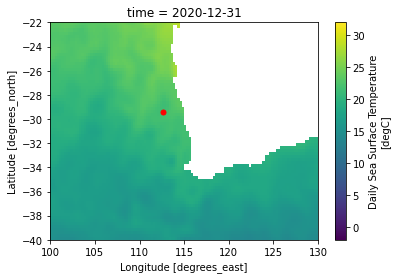

In [4]:
%matplotlib inline
dummy = data.sst.sel(lon = 112.5, lat = -29.5, method='nearest')[0]
fig, ax = plt.subplots(1,1)
data.sst[-1,:].plot(ax=ax, vmin=-2,vmax=32)
ax.plot(dummy.lon.values, dummy.lat.values, color='r', ms=5,marker='o')
ax.set_xlim(100,130)
ax.set_ylim(-40,-22);

#### Load the data
##### Daily time series of SST (from the same point used above) remotely-sensed from the AVHRR satellite platform

##### Uncomment to run full function but see below to save time

In [6]:
#%%time
#wa_ds = data.sst.sel(lon = 112.5, lat = -29.5, 
             #method='nearest').sel(time = slice("1982-01-01","2014-12-31")).load()

CPU times: user 359 ms, sys: 47.8 ms, total: 407 ms
Wall time: 6min 16s


In [7]:
#wa_ds.to_netcdf('wa_ds.nc')

In [ ]:
#Uncomment line below to start from here!
wa_ds=xr.open_dataset('wa_ds.nc').sst

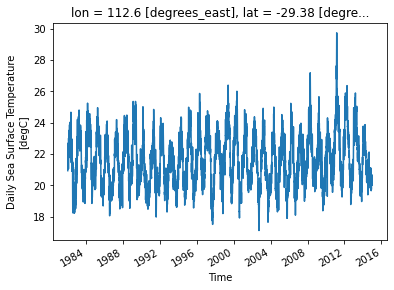

In [25]:
wa_ds.plot()

#### Run marineheat waves detection algorithm
##### Next we run the MHW detection algorithm which returns the variable mhws, consisting of the detected MHWs, and clim, consisting of the climatological (varying by day-of-year) seasonal cycle and extremes threshold:

In [10]:
# Generate time vector using datetime format (January 1 of year 1 is day 1)
t = np.arange(date(1982,1,1).toordinal(),date(2014,12,31).toordinal()+1)
dates = [date.fromordinal(tt.astype(int)) for tt in t]

In [11]:
# Detect MHW events
mhws_case1, clim_case1 = mhw.detect(t, wa_ds.values)

In [12]:
# This algorithm has detected the following number of MHW events:
mhws_case1['n_events']

60

In [33]:
mhws_case1['duration']

[12,
 6,
 19,
 5,
 7,
 20,
 7,
 5,
 6,
 6,
 11,
 16,
 9,
 16,
 6,
 10,
 5,
 5,
 38,
 14,
 20,
 95,
 29,
 5,
 5,
 14,
 10,
 12,
 9,
 5,
 34,
 8,
 8,
 10,
 9,
 5,
 18,
 5,
 24,
 16,
 40,
 61,
 18,
 19,
 12,
 5,
 38,
 41,
 45,
 5,
 14,
 14,
 13,
 5,
 5,
 5,
 6,
 11,
 10,
 5]

In [24]:
# The first ten events, for example, have the following maximum intensities (in C)
mhws_case1['intensity_max'][0:10]

[1.9759563938263902,
 2.1255383645334582,
 2.241348082019435,
 1.2863466816563793,
 1.8312707716418863,
 1.5018472363871922,
 2.2082389708488286,
 1.1157563117242653,
 1.690619499452648,
 1.9938329881237422]

##### Let's have a look at some properties associated with the event that has the largest maximum intensity

In [14]:
ev = np.argmax(mhws_case1['intensity_max']) #Largest event
print ('Maximum intensity:', mhws_case1['intensity_max'][ev], 'deg. C')
print ('Average intensity:', mhws_case1['intensity_mean'][ev], 'deg. C')
print ('Cumulative intensity:', mhws_case1['intensity_cumulative'][ev], 'deg. C-days')
print ('Duration:', mhws_case1['duration'][ev], 'days')
print ('Start date:', mhws_case1['date_start'][ev].strftime("%d %B %Y"))
print ('End date:', mhws_case1['date_end'][ev].strftime("%d %B %Y"))

Maximum intensity: 6.483709366090839 deg. C
Average intensity: 3.176277888886581 deg. C
Cumulative intensity: 193.75295122208144 deg. C-days
Duration: 61 days
Start date: 06 February 2011
End date: 07 April 2011


##### This turns out to be the infamous 2011 MHW off WA. Let's plot the SST time series over the full record and also have a closer look at the identified MHW event:

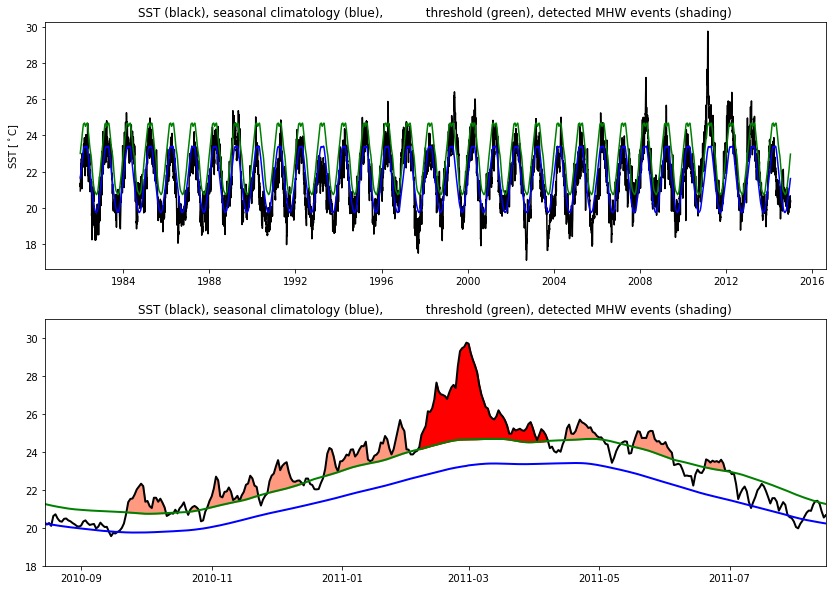

In [15]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
# Plot SST, seasonal cycle, and threshold
plt.plot(dates, wa_ds.values, 'k-')
plt.plot(dates, clim_case1['thresh'], 'g-')
plt.plot(dates, clim_case1['seas'], 'b-')
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
#plt.xlim(t[0], t[-1])
plt.ylim(wa_ds.min()-0.5, wa_ds.max()+0.5)
plt.ylabel(r'SST [$^\circ$C]')
plt.subplot(2,1,2)
# Find indices for all ten MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(ev-10, ev+11, 1):
    t1 = np.where(t==mhws_case1['time_start'][ev0])[0][0]
    t2 = np.where(t==mhws_case1['time_end'][ev0])[0][0]
    plt.fill_between(dates[t1:t2+1], wa_ds[t1:t2+1], clim_case1['thresh'][t1:t2+1], \
                     color=(1,0.6,0.5))
# Find indices for MHW of interest (2011 WA event) and shade accordingly
t1 = np.where(t==mhws_case1['time_start'][ev])[0][0]
t2 = np.where(t==mhws_case1['time_end'][ev])[0][0]
plt.fill_between(dates[t1:t2+1], wa_ds[t1:t2+1], clim_case1['thresh'][t1:t2+1], \
                 color='r')
# Plot SST, seasonal cycle, threshold, shade MHWs with main event in red
plt.plot(dates, wa_ds, 'k-', linewidth=2)
plt.plot(dates, clim_case1['thresh'], 'g-', linewidth=2)
plt.plot(dates, clim_case1['seas'], 'b-', linewidth=2)
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
#plt.xlim(mhws['time_start'][ev]-150, mhws['time_end'][ev]+150)
#plt.ylim(clim_case1['seas'].min() - 1, clim_case1['seas'].max() + mhws_case1['intensity_max'][ev] + 0.5)
#plt.ylabel(r'SST [$^\circ$C]')
plt.xlim(date(2010,8,15), date(2011,8,15))
plt.ylim(18,31);

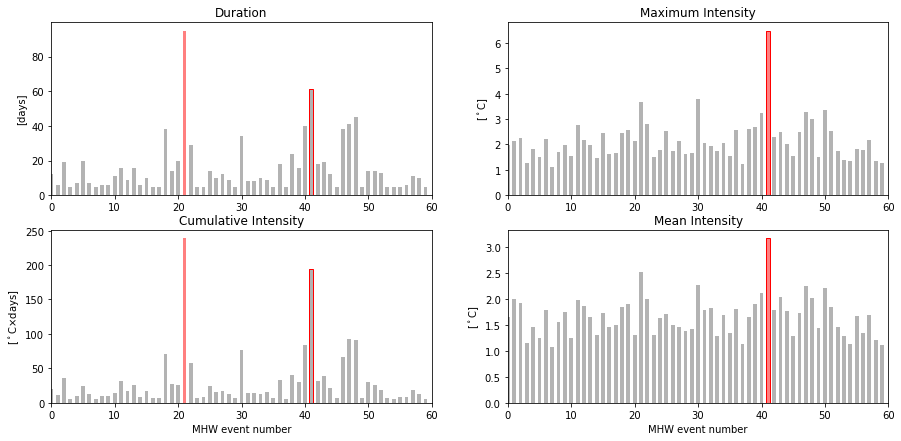

In [20]:
plt.figure(figsize=(15,7))
# Duration
plt.subplot(2,2,1)
evMax = np.argmax(mhws_case1['duration'])
plt.bar(range(mhws_case1['n_events']), mhws_case1['duration'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws_case1['duration'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws_case1['duration'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws_case1['n_events'])
plt.ylabel('[days]')
plt.title('Duration')
# Maximum intensity
plt.subplot(2,2,2)
evMax = np.argmax(mhws_case1['intensity_max'])
plt.bar(range(mhws_case1['n_events']), mhws_case1['intensity_max'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws_case1['intensity_max'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws_case1['intensity_max'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws_case1['n_events'])
plt.ylabel(r'[$^\circ$C]')
plt.title('Maximum Intensity')
# Mean intensity
plt.subplot(2,2,4)
evMax = np.argmax(mhws_case1['intensity_mean'])
plt.bar(range(mhws_case1['n_events']), mhws_case1['intensity_mean'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws_case1['intensity_mean'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws_case1['intensity_mean'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws_case1['n_events'])
plt.title('Mean Intensity')
plt.ylabel(r'[$^\circ$C]')
plt.xlabel('MHW event number')
# Cumulative intensity
plt.subplot(2,2,3)
evMax = np.argmax(mhws_case1['intensity_cumulative'])
plt.bar(range(mhws_case1['n_events']), mhws_case1['intensity_cumulative'], width=0.6, \
        color=(0.7,0.7,0.7))
plt.bar(evMax, mhws_case1['intensity_cumulative'][evMax], width=0.6, color=(1,0.5,0.5))
plt.bar(ev, mhws_case1['intensity_cumulative'][ev], width=0.6, edgecolor=(1,0.,0.), \
        color='none')
plt.xlim(0, mhws_case1['n_events'])
plt.title(r'Cumulative Intensity')
plt.ylabel(r'[$^\circ$C$\times$days]')
plt.xlabel('MHW event number');

In [21]:
# rank this MHW event
rank, returnPeriod = mhw.rank(t, mhws_case1)
print ("The 2011 WA event is ranked number " \
        + str(rank['duration'][ev]) + " by duration")
print ("The 2011 WA event is ranked number " \
        + str(rank['intensity_max'][ev]) + " by maximum intensity")
print ("The 2011 WA event is ranked number " \
        + str(rank['intensity_mean'][ev]) + " by mean intensity")
print ("The 2011 WA event is ranked number " \
        + str(rank['intensity_cumulative'][ev]) + " by cumulative intensity")

The 2011 WA event is ranked number 2 by duration
The 2011 WA event is ranked number 1 by maximum intensity
The 2011 WA event is ranked number 1 by mean intensity
The 2011 WA event is ranked number 2 by cumulative intensity
